In [1]:
import pandas as pd
import numpy as np
import FlowCal
#import sys
from numpy import NaN
from scipy import stats
import statistics
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
#from sklearn.cluster import KMeans
from scipy import signal
from scipy import linalg
from sklearn.decomposition import FastICA, PCA
#from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import plot_confusion_matrix
#from sklearn.ensemble import BaggingClassifier
import re


%matplotlib inline  
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['linalg']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
# reading list of drugs
ABs = pd.read_excel('cytof_antibodies.xls',index_col=0)
for iso_name in ABs.index:
    ABs.loc[iso_name,'channel']='(' + iso_name + ')Di'

ABs

,Target,Clone,Clone Reactivity,Clone Applications,Manufacturer,Lot,Description and Clone Validation (Manufacturer),Staining Concentration [µg/ml],User Clone Validation (Py2T by Mass Cytometry),channel
Isotope,,,,,,,,,,
La139,Purified Mouse Anti-CREB (pS133) / ATF-1 (pS63),J151-21,"Human, Mouse, Rat (predicted)","WB, FC",BD,558359,https://www.bdbiosciences.com/us/reagents/rese...,2.000,"Py2T, MEK1/2 signaling perturbation",(La139)Di
Pr141,pStat5 (pTyr694),47,Mouse; Human,"WB, FC",BD,2150654,https://www.bdbiosciences.com/us/applications/...,4.900,"30 min vanadate treatment, 125µM vs 30 min Un...",(Pr141)Di
Nd142,pSHP2 (pTyr580),D66F10,Human; Mouse; Rat,"WB, IP, FC",CST,2,https://www.cellsignal.com/products/primary-an...,4.000,18 h TPA vs Untreated,(Nd142)Di
Nd143,pFAK (pTyr397),poly7,Human; Mouse,WB,CST,5,https://www.cellsignal.com/products/primary-an...,2.500,5 Days 4 ng/mL TGFb vs 5 Days Untreated,(Nd143)Di
Nd144,MEK1/2 (pSer221),166F8,Human; Mouse,"WB, IHC, FC",CST,13,https://www.cellsignal.com/products/primary-an...,4.000,"30 min 4 ng/mL TGFb + Dabrafenib, AZ628 (bRaf,...",(Nd144)Di
Nd145,Twist,poly ABD29,Mouse; Human,"IH(P), ICC",Millipore,ABD29,http://www.merckmillipore.com/NL/en/product/An...,4.000,3 Days 4 ng/mL TGFb vs 3 Days Untreated,(Nd145)Di
Sm147,c-myc,D84C12,Human; Mouse,"WB, IF, FC",CST,7,https://www.cellsignal.com/products/primary-an...,6.000,18 h TPA vs Untreated,(Sm147)Di
Nd148,Snail,ab180714,Human; Mouse,"IHC-Fr, WB, ICC/IF, IHC-P",Abcam,AF3639,https://www.abcam.com/snail-slug-antibody-ab18...,5.000,3 Days 4 ng/mL TGFb vs 3 Days Untreated,(Nd148)Di
Sm149,Nanog,D2A3,Mouse,"WB, IP, FC, IF, ChiP",BD,2,https://www.cellsignal.com/products/primary-an...,3.000,Not validated by user,(Sm149)Di


In [3]:
drugs = pd.read_excel('cytof_drugs.xls',index_col=0)
drugs

,Cas Number,Reported Target,Catalog Number,Plate / Well
Compound in DMSO,,,,
Axitinib,319460-85-0,"VEGFR, PDGFR, c-Kit",S1005,A / B2
Dovitinib (TKI-258),"405169-16-6, 804551-71-1",FLT3,S1018,A / B3
Lapatinib Ditosylate (Tykerb),"388082-77-7, 231277-92-2 (free base), 1187538-...","EGFR, HER2",S1028,A / B4
Sorafenib (Nexavar),"475207-59-1, 284461-73-0 (free base)","VEGFR, PDGFR, Raf",S1040,A / B5
BMS-599626 (AC480),"714971-09-2, 873837-23-1 (HCl), 873837-22-0 (H2O)","EGFR, HER2",S1056,A / B6
SB 203580,"152121-47-6, 224047-03-4, 869185-85-3 (HCl)",p38 MAPK,S1076,A / B7
KU-55933,587871-26-9,ATM,S1092,A / B8
LY294002,"154447-36-6, 934389-88-5 (HCl)",PI3K,S1105,A / B9
JNJ-38877605,"943540-75-8, 1093204-17-1 (X methanesulfonate)...",c-Met,S1114,A / B10


In [4]:
Channels = pd.read_excel('Channels_names.xlsx',index_col=0)
channels_list = list(Channels['Channel Short Name'])

In [5]:
# loading names of datasets
annot_A = pd.read_csv('./PhEMD-Multi-batch analyses-Inhibitor Dataset A/experiment_83976_annotations.tsv',index_col=0,sep='\t')
annot_B = pd.read_csv('./PhEMD-Multi-batch analyses-Inhibitor Dataset B/experiment_83977_annotations.tsv',index_col=0,sep='\t')
annot_C = pd.read_csv('./PhEMD-Multi-batch analyses-Inhibitor Dataset C/experiment_83978_annotations.tsv',index_col=0,sep='\t')
annot_D = pd.read_csv('./PhEMD-Multi-batch analyses-Inhibitor Dataset D/experiment_83979_annotations.tsv',index_col=0,sep='\t')
annot_E1= pd.read_csv('./PhEMD-Multi-batch analyses-Inhibitor Dataset E/experiment_83981_annotations.tsv',index_col=0,sep='\t')
annot_E2= pd.read_csv('./PhEMD-E inhibitor dataset - Replicate 2/experiment_83989_annotations.tsv',index_col=0,sep='\t')
annot_E3= pd.read_csv('./PhEMD-E inhibitor dataset - Replicate 3/experiment_83990_annotations.tsv',index_col=0,sep='\t')

controls_MES_A = list(annot_A.filter(regex='TGFb_[A-Z]\d+_Singlets_[A-Z]\d+',axis=0).index)
controls_EPI_A = list(annot_A.filter(regex='Untreated_[A-Z]\d+_Singlets_[A-Z]\d+',axis=0).index)
treatments_A = list(set(annot_A.index).difference(controls_EPI_A).difference(controls_MES_A))

controls_MES_B = list(annot_B.filter(regex='TGFb_[A-Z]\d+_Singlets_[A-Z]\d+',axis=0).index)
controls_EPI_B = list(annot_B.filter(regex='Untreated_[A-Z]\d+_Singlets_[A-Z]\d+',axis=0).index)
treatments_B = list(set(annot_B.index).difference(controls_EPI_B).difference(controls_MES_B))

controls_MES_C = list(annot_C.filter(regex='TGFb_[A-Z]\d+_Singlets_[A-Z]\d+',axis=0).index)
controls_EPI_C = list(annot_C.filter(regex='Untreated_[A-Z]\d+_Singlets_[A-Z]\d+',axis=0).index)
treatments_C = list(set(annot_C.index).difference(controls_EPI_C).difference(controls_MES_C))

controls_MES_D = list(annot_D.filter(regex='TGFb_[A-Z]\d+_Singlets_[A-Z]\d+',axis=0).index)
controls_EPI_D = list(annot_D.filter(regex='Untreated_[A-Z]\d+_Singlets_[A-Z]\d+',axis=0).index)
treatments_D = list(set(annot_D.index).difference(controls_EPI_D).difference(controls_MES_D))

controls_MES_E1= list(annot_E1.filter(regex='TGFb_[A-Z]\d+_Singlets_[A-Z]\d+',axis=0).index)
controls_EPI_E1= list(annot_E1.filter(regex='Untreated_[A-Z]\d+_Singlets_[A-Z]\d+',axis=0).index)
treatments_E1= list(set(annot_E1.index).difference(controls_EPI_E1).difference(controls_MES_E1))

controls_MES_E2= list(annot_E2.filter(regex='TGFb_[A-Z]\d+\.fcs',axis=0).index)
controls_EPI_E2= list(annot_E2.filter(regex='Untreated_[A-Z]\d+\.fcs',axis=0).index)
treatments_E2= list(set(annot_E2.index).difference(controls_EPI_E2).difference(controls_MES_E2))

controls_MES_E3= list(annot_E3.filter(regex='TGFb_[A-Z]\d+\.fcs',axis=0).index)
controls_EPI_E3= list(annot_E3.filter(regex='Untreated_[A-Z]\d+\.fcs',axis=0).index)
treatments_E3= list(set(annot_E3.index).difference(controls_EPI_E3).difference(controls_MES_E3))

In [6]:
# reading controls, working with averages

# reading epithelial controls from dataset A
arr_fcs = []
for filename in controls_EPI_A:
    np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset A/'+filename)
    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels).mean(axis=0)
    arr_fcs.append(df_fcs)
controls_EPI_fcs_A = pd.DataFrame(arr_fcs,columns=np_fcs.channels)
controls_EPI_FC_A = controls_EPI_fcs_A.divide(controls_EPI_fcs_A.mean(axis=0))
controls_EPI_FC_A = controls_EPI_FC_A[ABs['channel']]
#controls_EPI_FC_A

# reading mesenchymal controls from dataset A
arr_fcs = []
for filename in controls_MES_A:
    np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset A/'+filename)
    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels).mean(axis=0)
    arr_fcs.append(df_fcs)
controls_MES_fcs_A = pd.DataFrame(arr_fcs,columns=np_fcs.channels)
controls_MES_FC_A = controls_MES_fcs_A.divide(controls_EPI_fcs_A.mean(axis=0))
controls_MES_FC_A = controls_MES_FC_A[ABs['channel']]
#controls_MES_FC_A

# reading epithelial controls from dataset B
arr_fcs = []
for filename in controls_EPI_B:
    np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset B/'+filename)
    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels).mean(axis=0)
    arr_fcs.append(df_fcs)
controls_EPI_fcs_B = pd.DataFrame(arr_fcs,columns=np_fcs.channels)
controls_EPI_FC_B = controls_EPI_fcs_B.divide(controls_EPI_fcs_B.mean(axis=0))
controls_EPI_FC_B = controls_EPI_FC_B[ABs['channel']]
#controls_EPI_FC_B

# reading mesenchymal controls from dataset B
arr_fcs = []
for filename in controls_MES_B:
    np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset B/'+filename)
    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels).mean(axis=0)
    arr_fcs.append(df_fcs)
controls_MES_fcs_B = pd.DataFrame(arr_fcs,columns=np_fcs.channels)
controls_MES_FC_B = controls_MES_fcs_B.divide(controls_EPI_fcs_B.mean(axis=0))
controls_MES_FC_B = controls_MES_FC_B[ABs['channel']]
#controls_MES_FC_B

# reading epithelial controls from dataset C
arr_fcs = []
for filename in controls_EPI_C:
    np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset C/'+filename)
    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels).mean(axis=0)
    arr_fcs.append(df_fcs)
controls_EPI_fcs_C = pd.DataFrame(arr_fcs,columns=np_fcs.channels)
controls_EPI_FC_C = controls_EPI_fcs_C.divide(controls_EPI_fcs_C.mean(axis=0))
controls_EPI_FC_C = controls_EPI_FC_C[ABs['channel']]
#controls_EPI_FC_C

# reading mesenchymal controls from dataset C
arr_fcs = []
for filename in controls_MES_C:
    np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset C/'+filename)
    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels).mean(axis=0)
    arr_fcs.append(df_fcs)
controls_MES_fcs_C = pd.DataFrame(arr_fcs,columns=np_fcs.channels)
controls_MES_FC_C = controls_MES_fcs_C.divide(controls_EPI_fcs_C.mean(axis=0))
controls_MES_FC_C = controls_MES_FC_C[ABs['channel']]
#controls_MES_FC_C

# reading epithelial controls from dataset D
arr_fcs = []
for filename in controls_EPI_D:
    np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset D/'+filename)
    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels).mean(axis=0)
    arr_fcs.append(df_fcs)
controls_EPI_fcs_D = pd.DataFrame(arr_fcs,columns=np_fcs.channels)
controls_EPI_FC_D = controls_EPI_fcs_D.divide(controls_EPI_fcs_D.mean(axis=0))
controls_EPI_FC_D = controls_EPI_FC_D[ABs['channel']]
#controls_EPI_FC_D

# reading mesenchymal controls from dataset D
arr_fcs = []
for filename in controls_MES_D:
    np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset D/'+filename)
    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels).mean(axis=0)
    arr_fcs.append(df_fcs)
controls_MES_fcs_D = pd.DataFrame(arr_fcs,columns=np_fcs.channels)
controls_MES_FC_D = controls_MES_fcs_D.divide(controls_EPI_fcs_D.mean(axis=0))
controls_MES_FC_D = controls_MES_FC_D[ABs['channel']]
#controls_MES_FC_D

# reading epithelial controls from dataset E1
arr_fcs = []
for filename in controls_EPI_E1:
    np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset E/'+filename)
    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels).mean(axis=0)
    arr_fcs.append(df_fcs)
controls_EPI_fcs_E1 = pd.DataFrame(arr_fcs,columns=np_fcs.channels)
controls_EPI_FC_E1 = controls_EPI_fcs_E1.divide(controls_EPI_fcs_E1.mean(axis=0))
controls_EPI_FC_E1 = controls_EPI_FC_E1[ABs['channel']]
#controls_EPI_FC_E1

# reading mesenchymal controls from dataset E1
arr_fcs = []
for filename in controls_MES_E1:
    np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset E/'+filename)
    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels).mean(axis=0)
    arr_fcs.append(df_fcs)
controls_MES_fcs_E1 = pd.DataFrame(arr_fcs,columns=np_fcs.channels)
controls_MES_FC_E1 = controls_MES_fcs_E1.divide(controls_EPI_fcs_E1.mean(axis=0))
controls_MES_FC_E1 = controls_MES_FC_E1[ABs['channel']]
#controls_MES_FC_E1

# reading epithelial controls from dataset E2
arr_fcs = []
for filename in controls_EPI_E2:
    np_fcs = FlowCal.io.FCSData('./PhEMD-E inhibitor dataset - Replicate 2/'+filename)
    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels).mean(axis=0)
    arr_fcs.append(df_fcs)
controls_EPI_fcs_E2 = pd.DataFrame(arr_fcs,columns=np_fcs.channels)
controls_EPI_FC_E2 = controls_EPI_fcs_E2.divide(controls_EPI_fcs_E2.mean(axis=0))
controls_EPI_FC_E2 = controls_EPI_FC_E2[ABs['channel']]
#controls_EPI_FC_E2

# reading mesenchymal controls from dataset E2
arr_fcs = []
for filename in controls_MES_E2:
    np_fcs = FlowCal.io.FCSData('./PhEMD-E inhibitor dataset - Replicate 2/'+filename)
    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels).mean(axis=0)
    arr_fcs.append(df_fcs)
controls_MES_fcs_E2 = pd.DataFrame(arr_fcs,columns=np_fcs.channels)
controls_MES_FC_E2 = controls_MES_fcs_E2.divide(controls_EPI_fcs_E2.mean(axis=0))
controls_MES_FC_E2 = controls_MES_FC_E2[ABs['channel']]

# reading epithelial controls from dataset E3
arr_fcs = []
for filename in controls_EPI_E3:
    np_fcs = FlowCal.io.FCSData('./PhEMD-E inhibitor dataset - Replicate 3/'+filename)
    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels).mean(axis=0)
    arr_fcs.append(df_fcs)
controls_EPI_fcs_E3 = pd.DataFrame(arr_fcs,columns=np_fcs.channels)
controls_EPI_FC_E3 = controls_EPI_fcs_E3.divide(controls_EPI_fcs_E3.mean(axis=0))
controls_EPI_FC_E3 = controls_EPI_FC_E3[ABs['channel']]
#controls_EPI_FC_E3

# reading mesenchymal controls from dataset E3
arr_fcs = []
for filename in controls_MES_E3:
    np_fcs = FlowCal.io.FCSData('./PhEMD-E inhibitor dataset - Replicate 3/'+filename)
    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels).mean(axis=0)
    arr_fcs.append(df_fcs)
controls_MES_fcs_E3 = pd.DataFrame(arr_fcs,columns=np_fcs.channels)
controls_MES_FC_E3 = controls_MES_fcs_E3.divide(controls_EPI_fcs_E3.mean(axis=0))
controls_MES_FC_E3 = controls_MES_FC_E3[ABs['channel']]
#controls_MES_FC_E3


In [7]:
# collating controls
total_EPI_controls = pd.concat([controls_EPI_FC_A,controls_EPI_FC_B,controls_EPI_FC_C,controls_EPI_FC_D,controls_EPI_FC_E1,controls_EPI_FC_E2,controls_EPI_FC_E3],axis=0,ignore_index=True)
EPI_cnt = total_EPI_controls.mean(axis=0)
total_MES_controls = pd.concat([controls_MES_FC_A,controls_MES_FC_B,controls_MES_FC_C,controls_MES_FC_D,controls_MES_FC_E1,controls_MES_FC_E2,controls_MES_FC_E3],axis=0,ignore_index=True)
MES_cnt = total_MES_controls.mean(axis=0)
#total_EPI_controls

In [8]:
# preparing data for STV calculation
trainset = pd.concat([total_EPI_controls,total_MES_controls],axis=0,ignore_index=True)
cls = list(np.full(len(total_EPI_controls),1)) + list(np.full(len(total_MES_controls),0))

# checking whether antibody indexes coincide
chck = True
for idx in range(len(trainset.columns)):
    if not (ABs.index[idx] in trainset.columns[idx]):
        chck = False
chck

True

<IPython.core.display.Javascript object>


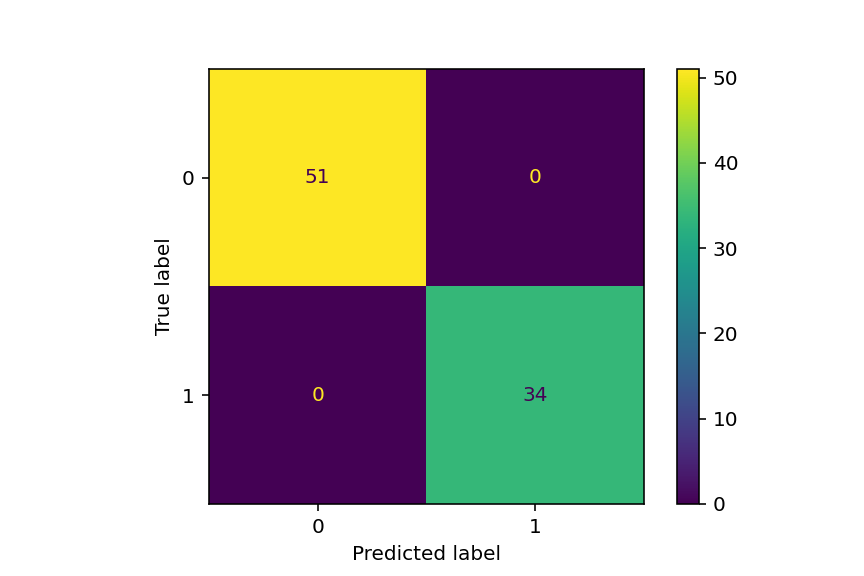

In [9]:
# building STV, using average values
svc = SVC(kernel='linear')
svc.fit(trainset,cls)
plot_confusion_matrix(svc,trainset,cls)

In [20]:
# saving STV results
b_coeff = svc.intercept_[0]/linalg.norm(svc.coef_[0])
norm_vec = - svc.coef_[0]/linalg.norm(svc.coef_[0])
s_vec = (MES_cnt - EPI_cnt)/linalg.norm(MES_cnt - EPI_cnt)

norm_vec_df = pd.DataFrame(list(s_vec),index=ABs['Target'],columns=['s_vec'])
norm_vec_df.insert(0,'norm_vec',norm_vec)
# plot STV ranking
norm_vec_df.to_csv('STV_EMT_Bodenmiller.csv')
norm_vec_df.sort_values(by='norm_vec')

# miuns is epithelial state
# plus is mesenchymal state

,norm_vec,s_vec
Target,,
CD24,-0.059436,-0.044166
E-Cadherin,-0.051843,-0.037688
ß-Catenin,-0.047228,-0.034940
pSTAT3 (pThr727),-0.042391,-0.017497
pMARCK (pSer167/Ser170),-0.041207,-0.027762
pSmad2/3 (pSmad2(pSer465/Ser467)/pSmad3(pSer423/Ser425),-0.025616,-0.015467
pS6 p(pSer235/Ser236),-0.022247,0.041387
pErk1/2 (pThr202/pTyr204),-0.018558,0.000454
NFkB (p65),-0.013625,-0.003053


In [21]:
np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
# vectors are nearly colinear

0.97855328810942

In [22]:
# now let's check how distribution of DPD looks at the single cell level
# TBD

In [23]:
# checking DPD values for controls
DPDs_EPI = []
for smpl in total_EPI_controls.index:
    DPD_val = -(b_coeff - np.dot(total_EPI_controls.iloc[smpl],norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
    DPDs_EPI.append(DPD_val)
print("DPD values for epithelial controls")
print(DPDs_EPI)

print('\n')

DPDs_MES = []
for smpl in total_MES_controls.index:
    DPD_val = -(b_coeff - np.dot(total_MES_controls.iloc[smpl],norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
    DPDs_MES.append(DPD_val)
print("DPD values for mesenchymal controls")
print(DPDs_MES)


DPD values for epithelial controls
[-8.434167657079662, -8.322381586980487, -8.41066893702643, -7.921074638835381, -7.370693425343314, -8.038674911569995, -8.135198503838936, -7.935742084897165, -8.236661158486228, -8.11270933035733, -8.078305786020719, -7.921381072478634, -8.326046537877104, -8.258172192394653, -7.875080380683276, -8.17388043040248, -8.19361512956877, -8.428533725561149, -8.287086078598593, -7.375870435355526, -7.606010576769374, -8.237560091834762, -8.34225781063594, -8.013219796093068, -8.259938164549855, -8.177566311492, -8.23146073715, -8.321188113964359, -7.636851455810423, -8.09191939136818, -7.890975331876948, -8.260093651684642, -7.886611561890914, -8.329508214022791]


DPD values for mesenchymal controls
[10.016282453250104, 7.558757708619073, 9.122880991240518, 7.433329728351148, 7.374144442664943, 9.616125886413435, 15.58090857390495, 20.151115917650856, 11.963384346727421, 11.010756614314486, 14.583827071703194, 11.642074842583792, 15.10289539409828, 13.01

In [24]:
# now we have to check how inhibitors change DPDs
drugs['DPD_value']=np.nan
drugs['DPD_change']=np.nan
location_regex = re.compile(r'([A-Z]) / ([A-Z]\d+)')
well_regex = re.compile(r'([A-Z]\d+)\.fcs')

for drug_name in drugs.index:
    # now we need to find appropriate file
    srch = location_regex.search(drugs.loc[drug_name,'Plate / Well'])
    if srch:
        if (srch.group(1) == "A"):
            # processing 1 replicate for A
            DPD_MES = - (b_coeff - np.dot(controls_MES_FC_A.mean(axis=0),norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
            for fcs_name in treatments_A:
                # extracting well number
                well_srch = well_regex.search(fcs_name)
                if not well_srch:
                    print('Wrong file name format!')
                if (well_srch.group(1) == srch.group(2)):
                    # we have found our file
                    np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset A/'+fcs_name)
                    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels)
                    df_FC = df_fcs.divide(controls_EPI_fcs_A.mean(axis=0))
                    df_FC = df_FC[ABs['channel']]
                    mean_FC = df_FC.mean(axis=0)
                    DPD_val = -(b_coeff - np.dot(mean_FC,norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
                    drugs.at[drug_name,'DPD_value'] = DPD_val
                    drugs.at[drug_name,'DPD_change'] = DPD_val - DPD_MES
        elif (srch.group(1) == "B"):
            # processing 1 replicate for B
            DPD_MES = - (b_coeff - np.dot(controls_MES_FC_B.mean(axis=0),norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
            for fcs_name in treatments_B:
                # extracting well number
                well_srch = well_regex.search(fcs_name)
                if not well_srch:
                    print('Wrong file name format!')
                if (well_srch.group(1) == srch.group(2)):
                    # we have found our file
                    np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset B/'+fcs_name)
                    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels)
                    df_FC = df_fcs.divide(controls_EPI_fcs_B.mean(axis=0))
                    df_FC = df_FC[ABs['channel']]
                    mean_FC = df_FC.mean(axis=0)
                    DPD_val = -(b_coeff - np.dot(mean_FC,norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
                    drugs.at[drug_name,'DPD_value'] = DPD_val
                    drugs.at[drug_name,'DPD_change'] = DPD_val - DPD_MES
        elif (srch.group(1) == "C"):
            # processing 1 replicate for C
            DPD_MES = - (b_coeff - np.dot(controls_MES_FC_C.mean(axis=0),norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
            for fcs_name in treatments_C:
                # extracting well number
                well_srch = well_regex.search(fcs_name)
                if (well_srch.group(1) == srch.group(2)):
                    # we have found our file
                    np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset C/'+fcs_name)
                    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels)
                    df_FC = df_fcs.divide(controls_EPI_fcs_C.mean(axis=0))
                    df_FC = df_FC[ABs['channel']]
                    mean_FC = df_FC.mean(axis=0)
                    DPD_val = -(b_coeff - np.dot(mean_FC,norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
                    drugs.at[drug_name,'DPD_value'] = DPD_val
                    drugs.at[drug_name,'DPD_change'] = DPD_val - DPD_MES
        elif (srch.group(1) == "D"):
            # processing 1 replicate for D
            DPD_MES = - (b_coeff - np.dot(controls_MES_FC_D.mean(axis=0),norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
            for fcs_name in treatments_D:
                # extracting well number
                well_srch = well_regex.search(fcs_name)
                if not well_srch:
                    print('Wrong file name format!')
                if (well_srch.group(1) == srch.group(2)):
                    # we have found our file
                    np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset D/'+fcs_name)
                    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels)
                    df_FC = df_fcs.divide(controls_EPI_fcs_D.mean(axis=0))
                    df_FC = df_FC[ABs['channel']]
                    mean_FC = df_FC.mean(axis=0)
                    DPD_val = -(b_coeff - np.dot(mean_FC,norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
                    drugs.at[drug_name,'DPD_value'] = DPD_val
                    drugs.at[drug_name,'DPD_change'] = DPD_val - DPD_MES
        elif (srch.group(1) == "E"):
            # processing 3 replicates for E
            DPD_MES_1 = - (b_coeff - np.dot(controls_MES_FC_E1.mean(axis=0),norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
            DPD_MES_2 = - (b_coeff - np.dot(controls_MES_FC_E2.mean(axis=0),norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
            DPD_MES_3 = - (b_coeff - np.dot(controls_MES_FC_E3.mean(axis=0),norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
            #print("Control for E: " + str(statistics.mean([DPD_MES_1,DPD_MES_2,DPD_MES_3])) + " ± " + str(stats.sem([DPD_MES_1,DPD_MES_2,DPD_MES_3])))
            # here we have to go replicate by replicate
            for fcs_name in treatments_E1:
                # extracting well number
                well_srch = well_regex.search(fcs_name)
                if not well_srch:
                    print('Wrong file name format!')
                if (well_srch.group(1) == srch.group(2)):
                    # we have found our file
                    np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset E/'+fcs_name)
                    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels)
                    df_FC = df_fcs.divide(controls_EPI_fcs_E1.mean(axis=0))
                    df_FC = df_FC[ABs['channel']]
                    mean_FC = df_FC.mean(axis=0)
                    DPD_val = -(b_coeff - np.dot(mean_FC,norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
                    drugs.at[drug_name,'DPD_value'] = (1.0/3.0) * DPD_val
                    drugs.at[drug_name,'DPD_change'] = (1.0/3.0) * (DPD_val - DPD_MES_1)
            for fcs_name in treatments_E2:
                # extracting well number
                well_srch = well_regex.search(fcs_name)
                if not well_srch:
                    print('Wrong file name format!')
                if (well_srch.group(1) == srch.group(2)):
                    # we have found our file
                    np_fcs = FlowCal.io.FCSData('./PhEMD-E inhibitor dataset - Replicate 2/'+fcs_name)
                    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels)
                    df_FC = df_fcs.divide(controls_EPI_fcs_E2.mean(axis=0))
                    df_FC = df_FC[ABs['channel']]
                    mean_FC = df_FC.mean(axis=0)
                    DPD_val = -(b_coeff - np.dot(mean_FC,norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
                    drugs.at[drug_name,'DPD_value'] = drugs.at[drug_name,'DPD_value'] + (1.0/3.0) * DPD_val
                    drugs.at[drug_name,'DPD_change'] = drugs.at[drug_name,'DPD_change'] + (1.0/3.0) * (DPD_val - DPD_MES_2)
            for fcs_name in treatments_E3:
                # extracting well number
                well_srch = well_regex.search(fcs_name)
                if not well_srch:
                    print('Wrong file name format!')
                if (well_srch.group(1) == srch.group(2)):
                    # we have found our file
                    np_fcs = FlowCal.io.FCSData('./PhEMD-E inhibitor dataset - Replicate 3/'+fcs_name)
                    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels)
                    df_FC = df_fcs.divide(controls_EPI_fcs_E3.mean(axis=0))
                    df_FC = df_FC[ABs['channel']]
                    mean_FC = df_FC.mean(axis=0)
                    DPD_val = -(b_coeff - np.dot(mean_FC,norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
                    drugs.at[drug_name,'DPD_value'] = drugs.at[drug_name,'DPD_value'] + (1.0/3.0) * DPD_val
                    drugs.at[drug_name,'DPD_change'] = drugs.at[drug_name,'DPD_change'] + (1.0/3.0) * (DPD_val - DPD_MES_3)
    else:
        print('wrong format of the "Plate / Well" column!')

drugs.to_csv('cytof_drugs_DPDs.csv')
drugs


,Cas Number,Reported Target,Catalog Number,Plate / Well,DPD_value,DPD_change
Compound in DMSO,,,,,,
Axitinib,319460-85-0,"VEGFR, PDGFR, c-Kit",S1005,A / B2,6.808037,-1.712216
Dovitinib (TKI-258),"405169-16-6, 804551-71-1",FLT3,S1018,A / B3,5.631614,-2.888639
Lapatinib Ditosylate (Tykerb),"388082-77-7, 231277-92-2 (free base), 1187538-...","EGFR, HER2",S1028,A / B4,4.182282,-4.337972
Sorafenib (Nexavar),"475207-59-1, 284461-73-0 (free base)","VEGFR, PDGFR, Raf",S1040,A / B5,5.392302,-3.127952
BMS-599626 (AC480),"714971-09-2, 873837-23-1 (HCl), 873837-22-0 (H2O)","EGFR, HER2",S1056,A / B6,6.079013,-2.441240
SB 203580,"152121-47-6, 224047-03-4, 869185-85-3 (HCl)",p38 MAPK,S1076,A / B7,5.853090,-2.667163
KU-55933,587871-26-9,ATM,S1092,A / B8,5.483866,-3.036387
LY294002,"154447-36-6, 934389-88-5 (HCl)",PI3K,S1105,A / B9,4.546456,-3.973797
JNJ-38877605,"943540-75-8, 1093204-17-1 (X methanesulfonate)...",c-Met,S1114,A / B10,10.258505,1.738252


In [ ]:
# picking core network
# MEK, ERK, AKT, mTOR, p38, CDK, SMADs (?), RTK (?), STATs (?), GSK3

In [ ]:
# building global response matrix


In [105]:
# using FlowCal to read files
#import FlowCal
#singlet_E7 = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset E/E1_5Days_TGFb_E7_Singlets_E7.fcs.fcs')
#singlet_E8 = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset E/E1_5Days_TGFb_E8_Singlets_E8.fcs.fcs')
#untreat_E2 = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset E/E1_5Days_Untreated_E2_Singlets_E2.fcs.fcs')
#untreat_E3 = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset E/E1_5Days_Untreated_E3_Singlets_E3.fcs.fcs')
control_fcs_no  = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset C/C3_5Days_Untreated_E2_Singlets_E2.fcs.fcs')
control_fcs_TGFb= FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset C/C3_5Days_TGFb_E7_Singlets_E7.fcs.fcs')
drug_fcs        = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset C/C3_5Days_TGFb_Trametinib_MEK12_D7_Singlets_D7.fcs.fcs')

#print(singlet_E7.shape)
#print(singlet_E7.channels)

In [114]:
Channel = '(Nd144)Di'

<IPython.core.display.Javascript object>


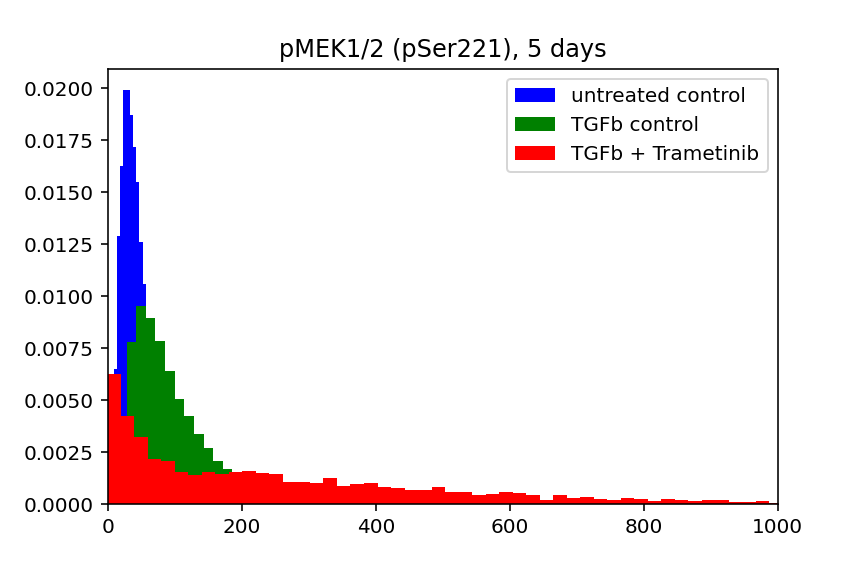

In [115]:
# trying to plot something from FlowCal
#plt.hist(singlet_E7[:, '(Yb174)Di'], bins=100,color='blue')
#plt.hist(singlet_E8[:, '(Yb174)Di'], bins=100,color='green')
plt.hist(control_fcs_no[:, Channel], bins=100,density=True,color='blue',label='untreated control')
plt.hist(control_fcs_TGFb[:, Channel], bins=100,density=True,color='green',label='TGFb control')
plt.hist(drug_fcs[:, Channel],bins=100,density=True,color='red',label='TGFb + Trametinib')

plt.title('pMEK1/2 (pSer221), 5 days')
plt.xlim(0,1000)
plt.legend()

plt.show()

In [116]:
print(statistics.mean(control_fcs_no[:, Channel]))
print(statistics.mean(control_fcs_TGFb[:, Channel]))
print(statistics.mean(drug_fcs[:, Channel]))

47.034504
93.88233
271.8161


In [117]:
Channel = '(Sm154)Di'

<IPython.core.display.Javascript object>


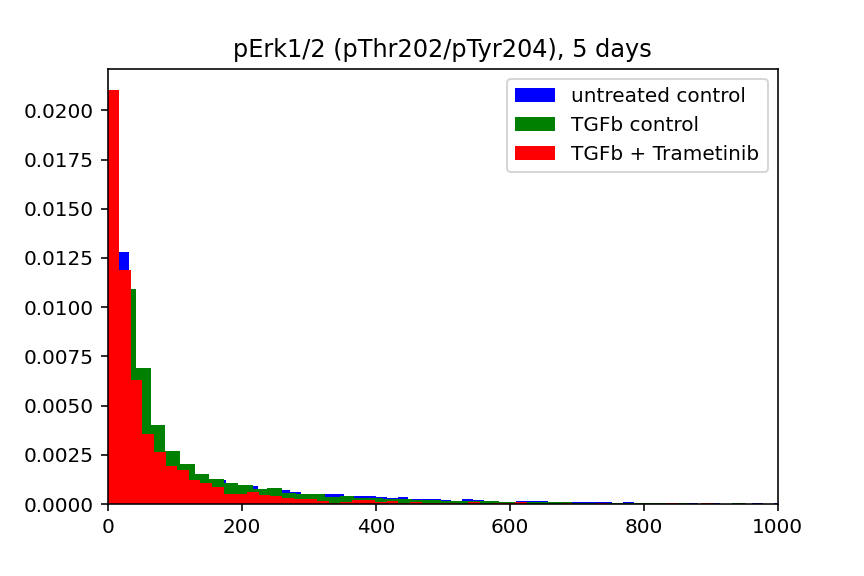

In [118]:
# trying to plot something from FlowCal
#plt.hist(singlet_E7[:, '(Yb174)Di'], bins=100,color='blue')
#plt.hist(singlet_E8[:, '(Yb174)Di'], bins=100,color='green')
plt.hist(control_fcs_no[:, Channel], bins=100,density=True,color='blue',label='untreated control')
plt.hist(control_fcs_TGFb[:, Channel], bins=100,density=True,color='green',label='TGFb control')
plt.hist(drug_fcs[:, Channel],bins=100,density=True,color='red',label='TGFb + Trametinib')

plt.title('pErk1/2 (pThr202/pTyr204), 5 days')
plt.xlim(0,1000)
plt.legend()

plt.show()

In [119]:
print(statistics.mean(control_fcs_no[:, Channel]))
print(statistics.mean(control_fcs_TGFb[:, Channel]))
print(statistics.mean(drug_fcs[:, Channel]))

118.31954
118.64567
65.747986


In [184]:
# using FlowCal to read files
#import FlowCal
#singlet_E7 = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset E/E1_5Days_TGFb_E7_Singlets_E7.fcs.fcs')
#singlet_E8 = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset E/E1_5Days_TGFb_E8_Singlets_E8.fcs.fcs')
#untreat_E2 = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset E/E1_5Days_Untreated_E2_Singlets_E2.fcs.fcs')
#untreat_E3 = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset E/E1_5Days_Untreated_E3_Singlets_E3.fcs.fcs')
control_fcs_no  = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset B/B1_5Days_Untreated_E2_Singlets_E2.fcs.fcs')
control_fcs_TGFb= FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset B/B1_5Days_TGFb_E7_Singlets_E7.fcs.fcs')
drug_fcs        = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset B/B1_5Days_TGFb_SB525334_TGFbR1_C7_Singlets_C7.fcs.fcs')

#print(singlet_E7.shape)
#print(singlet_E7.channels)

In [185]:
Channel = '(Nd144)Di'

<IPython.core.display.Javascript object>


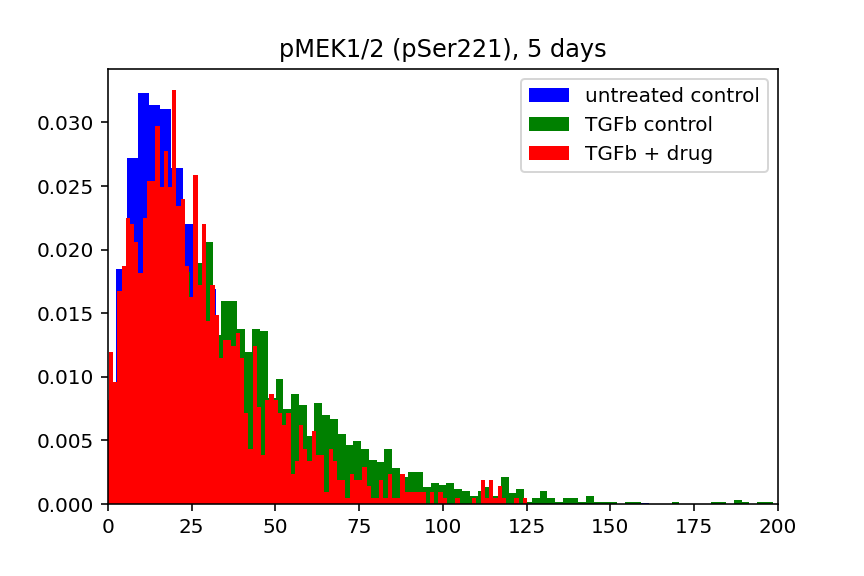

In [187]:
# trying to plot something from FlowCal
#plt.hist(singlet_E7[:, '(Yb174)Di'], bins=100,color='blue')
#plt.hist(singlet_E8[:, '(Yb174)Di'], bins=100,color='green')
plt.hist(control_fcs_no[:, Channel], bins=100,density=True,color='blue',label='untreated control')
plt.hist(control_fcs_TGFb[:, Channel], bins=100,density=True,color='green',label='TGFb control')
plt.hist(drug_fcs[:, Channel],bins=100,density=True,color='red',label='TGFb + drug')

plt.title('pMEK1/2 (pSer221), 5 days')
plt.xlim(0,200)
plt.legend()

plt.show()

In [188]:
print(statistics.mean(control_fcs_no[:, Channel]))
print(statistics.mean(control_fcs_TGFb[:, Channel]))
print(statistics.mean(drug_fcs[:, Channel]))

23.942314
40.708263
27.675825


In [189]:
Channel = '(Sm154)Di'

<IPython.core.display.Javascript object>


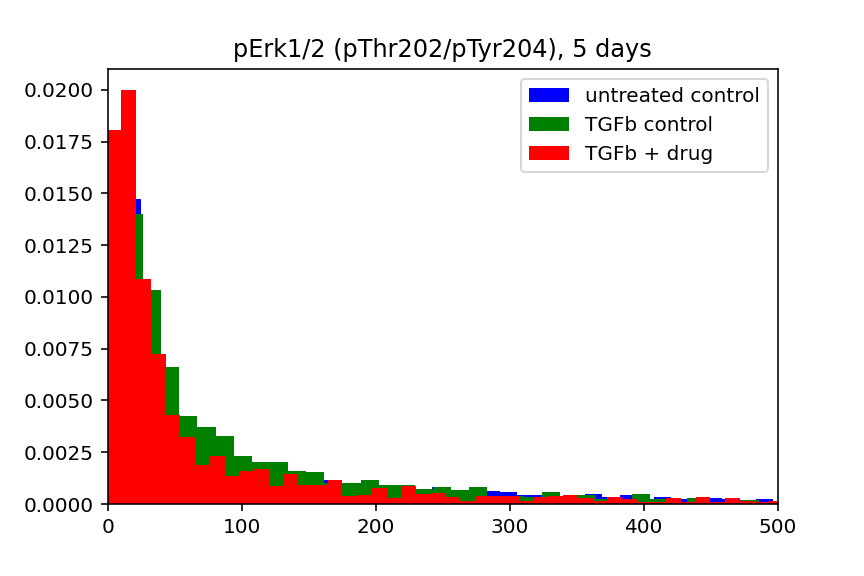

In [190]:
# trying to plot something from FlowCal
#plt.hist(singlet_E7[:, '(Yb174)Di'], bins=100,color='blue')
#plt.hist(singlet_E8[:, '(Yb174)Di'], bins=100,color='green')
plt.hist(control_fcs_no[:, Channel], bins=100,density=True,color='blue',label='untreated control')
plt.hist(control_fcs_TGFb[:, Channel], bins=100,density=True,color='green',label='TGFb control')
plt.hist(drug_fcs[:, Channel],bins=100,density=True,color='red',label='TGFb + drug')

plt.title('pErk1/2 (pThr202/pTyr204), 5 days')
plt.xlim(0,500)
plt.legend()

plt.show()

In [191]:
print(statistics.mean(control_fcs_no[:, Channel]))
print(statistics.mean(control_fcs_TGFb[:, Channel]))
print(statistics.mean(drug_fcs[:, Channel]))

108.89392
107.15617
91.09457


In [192]:
Channel = '(Dy164)Di'

<IPython.core.display.Javascript object>


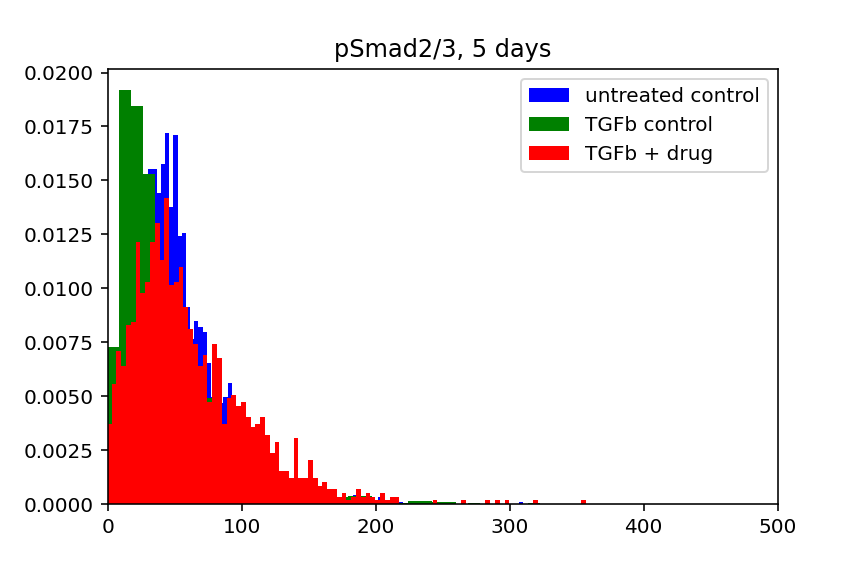

In [193]:
# trying to plot something from FlowCal
#plt.hist(singlet_E7[:, '(Yb174)Di'], bins=100,color='blue')
#plt.hist(singlet_E8[:, '(Yb174)Di'], bins=100,color='green')
plt.hist(control_fcs_no[:, Channel], bins=100,density=True,color='blue',label='untreated control')
plt.hist(control_fcs_TGFb[:, Channel], bins=100,density=True,color='green',label='TGFb control')
plt.hist(drug_fcs[:, Channel],bins=100,density=True,color='red',label='TGFb + drug')

plt.title('pSmad2/3, 5 days')
plt.xlim(0,500)
plt.legend()

plt.show()

In [194]:
print(statistics.mean(control_fcs_no[:, Channel]))
print(statistics.mean(control_fcs_TGFb[:, Channel]))
print(statistics.mean(drug_fcs[:, Channel]))

53.63462
44.566303
61.89533


In [195]:
Channel = '(Tb159)Di'

<IPython.core.display.Javascript object>


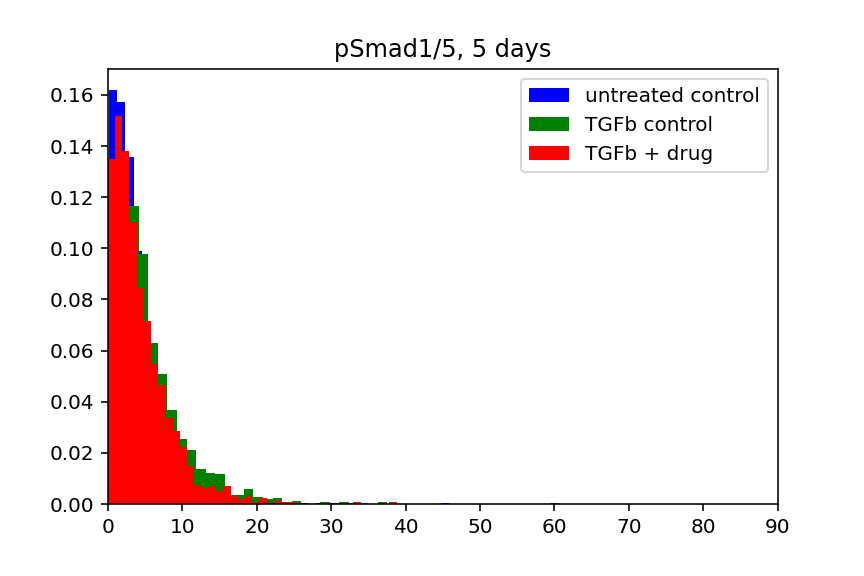

In [196]:
# trying to plot something from FlowCal
#plt.hist(singlet_E7[:, '(Yb174)Di'], bins=100,color='blue')
#plt.hist(singlet_E8[:, '(Yb174)Di'], bins=100,color='green')
plt.hist(control_fcs_no[:, Channel], bins=100,density=True,color='blue',label='untreated control')
plt.hist(control_fcs_TGFb[:, Channel], bins=100,density=True,color='green',label='TGFb control')
plt.hist(drug_fcs[:, Channel],bins=100,density=True,color='red',label='TGFb + drug')

plt.title('pSmad1/5, 5 days')
plt.xlim(0,90)
plt.legend()

plt.show()

In [197]:
print(statistics.mean(control_fcs_no[:, Channel]))
print(statistics.mean(control_fcs_TGFb[:, Channel]))
print(statistics.mean(drug_fcs[:, Channel]))

3.5200782
4.963577
4.001011


<IPython.core.display.Javascript object>


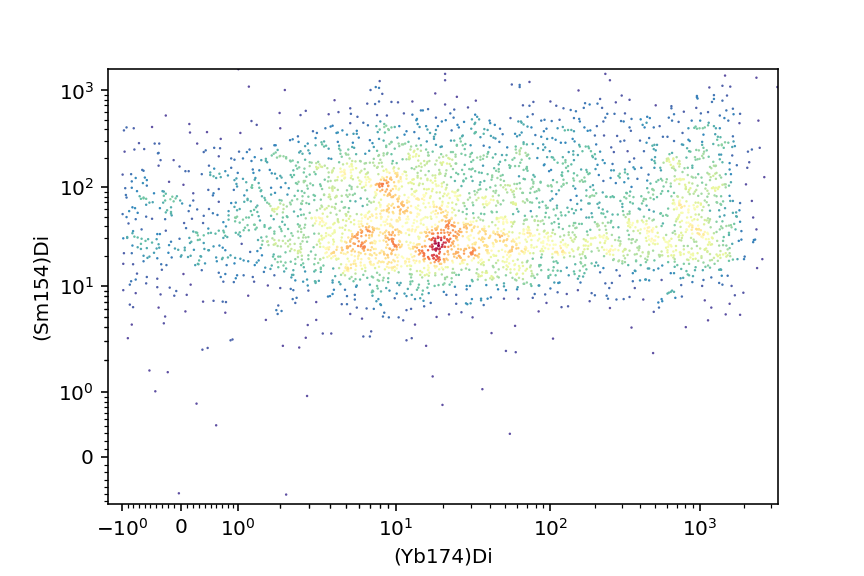

In [57]:
FlowCal.plot.density2d(singlet_E7, channels=['(Yb174)Di', '(Sm154)Di'], mode='scatter')